In [1]:
!pip install keras==3.2.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [2]:
import keras
keras.__version__

'3.2.1'

In [3]:
import os
os.environ["KERAS_BACKEND"] = "jax"

import gc
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt

import tensorflow as tf
import jax
import keras

from sklearn import metrics

from tqdm.notebook import tqdm

print(tf.__version__)
print(jax.__version__)

2.15.0
0.4.26


In [4]:
import os

from google.colab import drive

INIT=True
PATH="/content"

if INIT:
  drive.mount('/content/drive')
  ! pip install kaggle

  !mkdir ~/.kaggle


  ! cp kaggle.json ~/.kaggle/
  ! chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [5]:
#! kaggle datasets download -d abiolatti/leap-train-tfrecords
#! unzip -o  leap-train-tfrecords.zip -d    leap-train-tfrecords

In [6]:
! kaggle datasets download -d mpp1998/leap-percentiles-of-full-df
! unzip -o  leap-percentiles-of-full-df.zip -d    leap-percentiles-of-full-df

Dataset URL: https://www.kaggle.com/datasets/mpp1998/leap-percentiles-of-full-df
License(s): unknown
  0% 0.00/2.42M [00:00<?, ?B/s]
100% 2.42M/2.42M [00:00<00:00, 138MB/s]
Archive:  leap-percentiles-of-full-df.zip
  inflating: leap-percentiles-of-full-df/limits_train_percentiles.csv  
  inflating: leap-percentiles-of-full-df/myutils/constants.py  
  inflating: leap-percentiles-of-full-df/myutils/kaggle_metric_utilities.py  
  inflating: leap-percentiles-of-full-df/myutils/metric.py  
  inflating: leap-percentiles-of-full-df/percentiles.pkl  


In [7]:
df_limits = pd.read_csv("leap-percentiles-of-full-df/limits_train_percentiles.csv",index_col=0)
df_limits.sort_values(by="max") .head(50)

,max,min,q99,q01,std,mean
column,,,,,,
ptend_q0002_12,-2.147357e-53,-2.692638e-38,-1.062446e-48,-5.291556e-39,7.798521e-41,-2.113759e-41
ptend_q0002_6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_9,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_17,0.000000e+00,-1.394760e-39,0.000000e+00,-5.596019e-56,1.369964e-43,-3.815392e-46
ptend_q0002_16,0.000000e+00,-1.959202e-44,0.000000e+00,0.000000e+00,1.684660e-48,-5.760587e-51
ptend_q0002_15,0.000000e+00,-6.381237e-48,0.000000e+00,0.000000e+00,3.346434e-52,-9.342572e-55


In [8]:
df_limits[["std","std"]].values

array([[  5.97902046,   5.97902046],
       [  8.15894896,   8.15894896],
       [  7.96972228,   7.96972228],
       ...,
       [116.33490848, 116.33490848],
       [ 46.37734006,  46.37734006],
       [ 29.67401422,  29.67401422]])

In [9]:
clip_values = ((df_limits[["min","max"]].values - df_limits[["mean","mean"]].values)/df_limits[["std","std"]].values)

<ipython-input-9-f8d24077d6de>:1: RuntimeWarning: divide by zero encountered in divide
  clip_values = ((df_limits[["min","max"]].values - df_limits[["mean","mean"]].values)/df_limits[["std","std"]].values)
<ipython-input-9-f8d24077d6de>:1: RuntimeWarning: invalid value encountered in divide
  clip_values = ((df_limits[["min","max"]].values - df_limits[["mean","mean"]].values)/df_limits[["std","std"]].values)


In [10]:
clip_values[clip_values[:,0]>1000000,0] = 0
clip_values[clip_values[:,1]>1000000,1] = 0
clip_values[np.isnan(clip_values[:,0]),0]=0
clip_values[np.isnan(clip_values[:,1]),1]=0
clip_values_tf = tf.constant(clip_values, dtype=tf.float32)
clip_values[clip_values[:,0]>1000000]

array([], shape=(0, 2), dtype=float64)

In [11]:
def clip_features(features):
    min_vals = clip_values_tf[:556, 0]
    max_vals = clip_values_tf[:556, 1]
    clipped_features = tf.clip_by_value(features, min_vals, max_vals)
    return clipped_features

In [12]:
def clip_targets(features):
    min_vals = clip_values_tf[556:, 0]
    max_vals = clip_values_tf[556:, 1]
    clipped_features = tf.clip_by_value(features, min_vals, max_vals)
    return clipped_features

In [13]:
SEED = 42
keras.utils.set_random_seed(SEED)
tf.random.set_seed(SEED)
tf.config.experimental.enable_op_determinism()

In [14]:

DATA_TFREC = "leap-train-tfrecords"

In [15]:
from google.colab import auth
auth.authenticate_user()

In [16]:
!gcloud auth application-default login


You are running on a Google Compute Engine virtual machine.
The service credentials associated with this virtual machine
will automatically be used by Application Default
Credentials, so it is not necessary to use this command.

If you decide to proceed anyway, your user credentials may be visible
to others with access to this virtual machine. Are you sure you want
to authenticate with your personal account?

Do you want to continue (Y/n)?  y

Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fapplicationdefaultauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=HNCDGG3m4BEu5Nqt4dMNL4WTMi7EzJ&prompt=consent&token_

In [17]:
project_id = 'midyear-data-392210'
!gcloud config set project {project_id}


To update your Application Default Credentials quota project, use the `gcloud auth application-default set-quota-project` command.
Updated property [core/project].


In [18]:
f__ = [e for e in df_limits.index]

In [19]:
from google.cloud import storage
bucket_name="dataleap_new_tensors"




storage_client = storage.Client(project= 'midyear-data-392210')
blobs = storage_client.list_blobs(bucket_name)

/usr/local/lib/python3.10/dist-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [20]:
files=  [b. name for b in blobs]

In [27]:
len(files), files[0]

(159, 'new_record_E3SM-MMF.mli.0001-02-08-19200.tfrec')

In [28]:
BATCH_SIZE = 1024*8

In [29]:
import tensorflow as tf
import os

# Define the GCS path to your TFRecord files
DATA_TFREC = "gs://dataleap_new_tensors/"



train_files = [os.path.join(DATA_TFREC, file) for i,file in enumerate(files) if i not in [10,30,50,70]]
valid_files = [os.path.join(DATA_TFREC, file) for i,file in enumerate(files) if i    in [10,30,50,70]]



# Function to parse a single example from the TFRecord file
#TFRecords boilerplate
def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[np.float32(value)]))

def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def serialize_example(feats):
    """
    Creates a tf.train.Example message ready to be written to a file.
    """
    # Create a dictionary mapping the feature name to the tf.train.Example-compatible
    # data type.
    feature = {
       (f__)[i]: _float_feature(feats[i]) for i in range(len(feats))
    }
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()


def _parse_function1(proto):
    # Define your feature description dictionary according to your TFRecord structure
    feature_description = {
          'features': tf.io.FixedLenFeature([556], tf.float32),
          'targets': tf.io.FixedLenFeature([368], tf.float32),
        # Add more features here
    }
    e =  tf.io.parse_single_example(proto, feature_description)

    e["features"] = clip_features(e["features"])
    e["targets"] = clip_targets(e["targets"])
    return e["features"],e["targets"]

In [30]:
dataset=tf.data.Dataset.range(1,6)
dataset=dataset.interleave(lambda x:tf.data.Dataset.from_tensors(x).repeat(1),cycle_length=2,block_length=2)
list(dataset.as_numpy_iterator())

[1, 2, 3, 4, 5]

In [31]:
len(train_files),len(valid_files)

(155, 4)

In [32]:



# Define options for the training dataset
train_options = tf.data.Options()
train_options.deterministic = True

# Create the training dataset
ds_train = (
    tf.data.Dataset.from_tensor_slices(train_files)
    .with_options(train_options)
    .shuffle(100)
    .interleave(
        lambda file: tf.data.TFRecordDataset(file).map(_parse_function1, num_parallel_calls=tf.data.AUTOTUNE),
        num_parallel_calls=tf.data.AUTOTUNE,
        cycle_length=10,
        block_length=1000,
        deterministic=True
    )
    .shuffle(4 * BATCH_SIZE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

# Create the validation dataset
ds_valid = (
    tf.data.Dataset.from_tensor_slices(valid_files)
    .interleave(
        lambda file: tf.data.TFRecordDataset(file).map(_parse_function1, num_parallel_calls=tf.data.AUTOTUNE),
        num_parallel_calls=tf.data.AUTOTUNE,
        cycle_length=1,
        block_length=1,
        deterministic=True
    )
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

# Print the first batch from the training dataset to verify
for batch in ds_train.take(1):
    print(batch)

# Print the first batch from the validation dataset to verify
for batch in ds_valid.take(1):
    print(batch)

(<tf.Tensor: shape=(8192, 556), dtype=float32, numpy=
array([[ 0.61839527,  0.52627355, -0.13732278, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.5028974 ,  0.2409471 ,  1.1187507 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.3279243 ,  1.1932592 ,  0.817487  , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.7078927 , -1.9995005 , -1.5111518 , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.3520653 ,  0.8627062 ,  1.6066474 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00401046, -0.7345823 , -0.15715195, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)>, <tf.Tensor: shape=(8192, 368), dtype=float32, numpy=
array([[ 0.8861045 ,  0.64694214,  1.1297127 , ...,  0.76154935,
         2.6697886 ,  3.2699583 ],
       [ 0.55442274,  1.1085104 ,  0.6249715 , ...,  1.9859964 ,
         1.5013679 ,  0.86435556],
       [ 0.68476427,  0.36674806,  0.7821724 , ...,  0.92656213

In [ ]:
#norm_x = keras.layers.Normalization()
#norm_x.adapt(ds_train.map(lambda x:tf.reshape(x['ptend_u_46'],(-1,1))))



In [ ]:
#norm_y = keras.layers.Normalization()
#norm_y.adapt(ds_train.map(lambda x, y: y))

#mean_y = norm_y.mean
#stdd_y = keras.ops.maximum(1e-10, norm_y.variance ** 0.5)




### Model definition & Training

In [33]:
import jax.numpy as jnp
import keras

In [34]:
@keras.saving.register_keras_serializable(package="MyMetrics", name="ClippedR2Score")
class ClippedR2Score(keras.metrics.Metric):
    def __init__(self, name='r2_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.base_metric = keras.metrics.R2Score(class_aggregation=None)

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.base_metric.update_state(y_true, y_pred, sample_weight=None)

    def result(self):
        return keras.ops.mean(keras.ops.clip(self.base_metric.result(), 0.0, 1.0))

    def reset_states(self):
        self.base_metric.reset_states()

In [35]:
@keras.saving.register_keras_serializable()


def r2_mult_keras(y_true, y_pred):

    SS_res =  tf.reduce_sum((y_true - y_pred),axis=0)
    SS_tot = tf.reduce_sum((y_true - tf.reduce_mean(y_true, axis=0 )),axis=0)
    vals = 1 - SS_res/(SS_tot+0.00000000001)
    vals_clipped = tf.where(vals < 0, tf.zeros_like(vals), vals)


    return     tf.reduce_mean(vals_clipped )

In [36]:
(len(train_files) * 200_000 / BATCH_SIZE)

3784.1796875

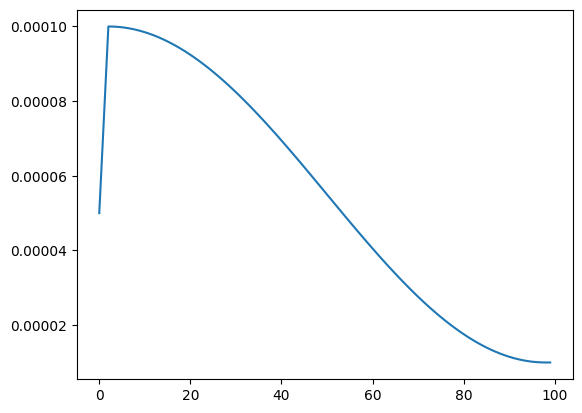

In [37]:
epochs = 100  # 25  # 15  # 12
learning_rate = 1e-4

epochs_warmup = 2
epochs_ending = 2
steps_per_epoch =int(np.floor(len(train_files) * 200_000 / BATCH_SIZE))
lr_scheduler = keras.optimizers.schedules.CosineDecay(
    5e-5,
    (epochs - epochs_warmup - epochs_ending) * steps_per_epoch,
    warmup_target=learning_rate,
    warmup_steps=steps_per_epoch * epochs_warmup,
    alpha=0.1
)

plt.plot([lr_scheduler(it) for it in range(0, epochs * steps_per_epoch, steps_per_epoch)]);

In [38]:
steps_per_epoch

3784

In [39]:
keras.__version__

'3.2.1'

In [40]:
keras.utils.clear_session()

import keras
def x_to_seq(x):
    x_seq0 = keras.ops.transpose(keras.ops.reshape(x[:, 0:60 * 6], (-1, 6, 60)), (0, 2, 1))
    x_seq1 = keras.ops.transpose(keras.ops.reshape(x[:, 60 * 6 + 16:60 * 9 + 16], (-1, 3, 60)), (0, 2, 1))
    x_flat = keras.ops.reshape(x[:, 60 * 6:60 * 6 + 16], (-1, 1, 16))
    x_flat = keras.ops.repeat(x_flat, 60, axis=1)
    return keras.ops.concatenate([x_seq0, x_seq1, x_flat], axis=-1)


def build_cnn(activation='relu'):
    return keras.Sequential([
        keras.layers.Conv1D(1014, 5, padding='same', activation=activation),
        keras.layers.BatchNormalization(),
        keras.layers.Conv1D(512, 7, padding='same', activation=activation),
        keras.layers.BatchNormalization(),
        keras.layers.Conv1D(256, 11, padding='same', activation=activation),
        keras.layers.BatchNormalization(),
    ])

def build_cnn1(activation='relu'):
    return keras.Sequential([
        keras.layers.Conv1D(1014, 3, padding='same', activation=activation),
        keras.layers.BatchNormalization(),
        keras.layers.Conv1D(512, 3, padding='same', activation=activation),
        keras.layers.BatchNormalization(),
        keras.layers.Conv1D(256, 3, padding='same', activation=activation),
        keras.layers.BatchNormalization(),
    ])


X_input = x = keras.layers.Input(ds_train.element_spec[0].shape[1:])
#x = keras.layers.Normalization(mean=norm_x.mean, variance=norm_x.variance)(x)
x = x_to_seq(x)


e = e0 = keras.layers.Conv1D(256, 1, padding='same')(x)
e1 = build_cnn()(e)
e2 = build_cnn1()(e)

e=tf.keras.layers.Add()([e0,e1])

# add global average to allow some comunication between all levels even in a small CNN
e = e0 + e + keras.layers.GlobalAveragePooling1D(keepdims=True)(e)
e = keras.layers.BatchNormalization()(e)
e = e + build_cnn()(e)


p_all = keras.layers.Conv1D(14, 1, padding='same')(e)

p_seq = p_all[:, :, :6]
p_seq = keras.ops.transpose(p_seq, (0, 2, 1))
p_seq = keras.layers.Flatten()(p_seq)
assert p_seq.shape[-1] == 360

p_flat = p_all[:, :, 6:6 + 8]
p_flat = keras.ops.mean(p_flat, axis=1)
assert p_flat.shape[-1] == 8

P = keras.ops.concatenate([p_seq, p_flat], axis=1)

# build & compile
model = keras.Model(X_input, P)
model.compile(
    loss='mse',
    optimizer=keras.optimizers.Adam(lr_scheduler),
    metrics=[ClippedR2Score()]
)
model.build(tuple(ds_train.element_spec[0].shape))
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 556)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 360)            │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 180)            │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 16)             │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 6, 60)          │              0 │ get_item[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 3, 60)          │              0 │ get_item_1[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_2 (Reshape)       │ (None, 1, 16)          │              0 │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transpose (Transpose)     │ (None, 60, 6)          │              0 │ reshape[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transpose_1 (Transpose)   │ (None, 60, 3)          │              0 │ reshape_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ repeat (Repeat)           │ (None, 60, 16)         │              0 │ reshape_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 60, 25)         │              0 │ transpose[0][0],       │
│                           │                        │                │ transpose_1[0][0],     │
│                           │                        │                │ repeat[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 60, 256)        │          6,656 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 60, 256)        │      6,382,798 │ conv1d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 60, 256)        │              0 │ conv1d[0][0],          │
│                           │                        │                │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 60, 256)        │              0 │ conv1d[0][0],          │
│                           │                        │                │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 1, 256)         │              0 │ add[0][0]              │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 60, 256)        │              0 │ add_1[0][0],           │
│                      

 Total params: 12,776,874 (48.74 MB)

 Trainable params: 12,769,234 (48.71 MB)

 Non-trainable params: 7,640 (29.84 KB)

In [41]:
import sys
sys.version

'3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]'

In [42]:
epochs

100

In [ ]:
#model = keras.models.load_model('drive/MyDrive/seq_to_seq_v3_2.keras')

In [ ]:
#ds_train_target_normalized = ds_train.map(lambda x, y: (x, (y - mean_y) / stdd_y))
#ds_valid_target_normalized = ds_valid.map(lambda x, y: (x, (y - mean_y) / stdd_y))

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=epochs,
    verbose=1,
    callbacks=[
        keras.callbacks.ModelCheckpoint(filepath='model.keras')
    ]
)

Epoch 1/100
   3786/Unknown 2946s 772ms/step - loss: 1.9324 - r2_score: 0.2413

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3786/3786 ━━━━━━━━━━━━━━━━━━━━ 3243s 850ms/step - loss: 1.9323 - r2_score: 0.2413 - val_loss: 2.0594 - val_r2_score: 0.3363
Epoch 2/100
3786/3786 ━━━━━━━━━━━━━━━━━━━━ 3184s 840ms/step - loss: 1.1827 - r2_score: 0.3965 - val_loss: 1.8869 - val_r2_score: 0.3446
Epoch 3/100
3786/3786 ━━━━━━━━━━━━━━━━━━━━ 3166s 835ms/step - loss: 0.6742 - r2_score: 0.4326 - val_loss: 0.8838 - val_r2_score: 0.4030
Epoch 4/100
3786/3786 ━━━━━━━━━━━━━━━━━━━━ 3173s 837ms/step - loss: 0.6515 - r2_score: 0.4479 - val_loss: 1.4247 - val_r2_score: 0.3885
Epoch 5/100
3786/3786 ━━━━━━━━━━━━━━━━━━━━ 3332s 879ms/step - loss: 0.4949 - r2_score: 0.4770 - val_loss: 1.2069 - val_r2_score: 0.4544
Epoch 6/100
1515/3786 ━━━━━━━━━━━━━━━━━━━━ 29:09 770ms/step - loss: 0.4982 - r2_score: 0.4841

In [ ]:
tf.__version__

In [ ]:
plt.plot(history.history['loss'], color='tab:blue')
plt.plot(history.history['val_loss'], color='tab:red')
plt.yscale('log');

In [ ]:
y_valid = np.concatenate([yb for _, yb in ds_valid])
p_valid = model.predict(ds_valid, batch_size=BATCH_SIZE) * stdd_y + mean_y

In [ ]:
scores_valid = np.array([metrics.r2_score(y_valid[:, i], p_valid[:, i]) for i in range(len(TARGETS))])
plt.plot(scores_valid.clip(-1, 1))

In [ ]:
import numpy as np

In [ ]:
with open(f"scores.npy","wb") as file:
    np.save(file,scores_valid)

In [ ]:
mask = scores_valid <= 1e-3
f"Number of under-performing targets: {sum(mask)}"

In [ ]:
f"Clipped score: {scores_valid.clip(0, 1).mean()}"

In [ ]:
del y_valid, p_valid
gc.collect();

# Submission

In [ ]:
sample = pl.read_csv("/kaggle/input/leap-atmospheric-physics-ai-climsim/sample_submission.csv")

In [ ]:
df_test = (
    pl.scan_csv("/kaggle/input/leap-atmospheric-physics-ai-climsim/test.csv")
    .select(pl.exclude("sample_id"))
    .cast(pl.Float32)
    .collect()
)

In [ ]:
p_test = model.predict(df_test.to_numpy(), batch_size=4 * BATCH_SIZE) * stdd_y + mean_y
p_test = np.array(p_test)
p_test[:, mask] = mean_y[:, mask]

In [ ]:
# correction of ptend_q0002 targets (from 12 to 29)
df_p_test = pd.DataFrame(p_test, columns=TARGETS)

for idx in range(12, 30):
    df_p_test[f"ptend_q0002_{idx}"] = -df_test[f"state_q0002_{idx}"].to_numpy() / 1200

p_test = df_p_test.values

In [ ]:
submission = sample.to_pandas()
submission[TARGETS] = submission[TARGETS] * p_test
pl.from_pandas(submission[["sample_id"] + TARGETS]).write_csv("submission.csv")